In [1]:
import cv2

def get_first_frame(video_path):
    """
    Lấy frame đầu tiên của video
    Args:
        video_path: đường dẫn file video
    Returns:
        frame: numpy array (H, W, 3) BGR, hoặc None nếu lỗi
    """
    cap = cv2.VideoCapture(video_path)
    
    if not cap.isOpened():
        print("Không mở được video:", video_path)
        return None

    ret, frame = cap.read()  # đọc frame đầu tiên
    cap.release()  # giải phóng resource

    if not ret:
        print("Không đọc được frame đầu tiên")
        return None

    return frame

In [59]:
import numpy as np
from ultralytics import YOLO

class Segmentater:
    def __init__(self, config):
        self.model = YOLO(config.get('model_path', r"E:\Final-Thesis\resources\models\model_seg.pt"))

    def get_combined_mask(self, imgs, mask_values=[50, 25]):
        results = self.model.predict(imgs, verbose=False)
        all_masks = []

        for res in results:
            if res.masks is None:
                all_masks.append(None)
                continue

            masks = res.masks.data.cpu().numpy().astype(np.uint8)  # (N, H, W)
            combined = np.zeros(masks.shape[1:], dtype=np.uint8)   # (H, W) -> 1 kênh

            for i, mask in enumerate(masks):
                val = mask_values[i] if i < len(mask_values) else 1
                combined[mask > 0] = val

            all_masks.append(combined)

        return all_masks


In [60]:
seg = Segmentater({})

In [64]:
frame = get_first_frame(r'E:\final-thesis-real\storage\video\cam_1.mp4')
frame = cv2.imread(r'E:\final-thesis-real\storage\image\img_test.jpg')

In [65]:
mask = seg.get_combined_mask([frame])

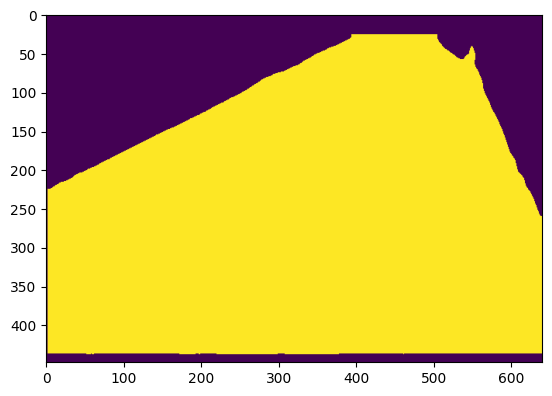

In [66]:
import matplotlib.pyplot as plt

plt.imshow(mask[0])

In [68]:
import cv2
resized_mask = cv2.resize(mask[0], (64, 64), interpolation=cv2.INTER_NEAREST)
print(np.unique(resized_mask))  # vẫn ra [0, 25]


[ 0 50]


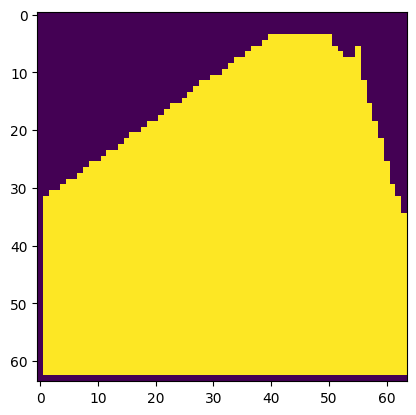

In [69]:
plt.imshow(resized_mask)

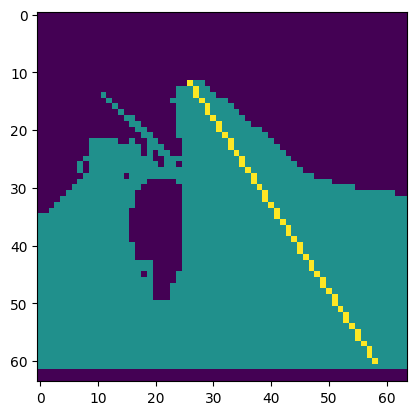

In [1]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread(r'E:\final-thesis-real\storage\mask\cam_2.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img)

In [2]:
import sqlite3

db_path = r"E:\final-thesis-real\storage\databse.db"

# Kết nối tới database
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Kiểm tra xem bảng có tồn tại
cursor.execute("""
    SELECT name 
    FROM sqlite_master 
    WHERE type='table' AND name='camera_objs';
""")
table_exists = cursor.fetchone()

if table_exists:
    # Lấy toàn bộ dữ liệu từ bảng
    cursor.execute("SELECT * FROM camera_objs;")
    rows = cursor.fetchall()

    # In tên cột
    cursor.execute("PRAGMA table_info(camera_objs);")
    columns = [info[1] for info in cursor.fetchall()]
    print(" | ".join(columns))

    # In dữ liệu
    for row in rows:
        print(row)
else:
    print("Bảng 'camera_objs_false' không tồn tại!")

conn.close()


id | objs | last_id | last_update
('cam_2', '1,579,153,1,94,0,0,0,0,0,0 2,489,94,1,74,0,0,0,0,0,0 5,220,22,1,24,0,0,0,0,0,0 6,403,169,1,147,0,0,0,0,0,0 16,335,21,1,26,0,0,0,0,0,0 17,304,12,1,22,0,0,0,0,4,0 25,264,20,1,31,0,0,0,0,0,0 27,253,49,0,36,0,0,0,0,0,0', 28, '2025-12-12T13:39:00.126040')
